# PSET 2 - Q4

## a)

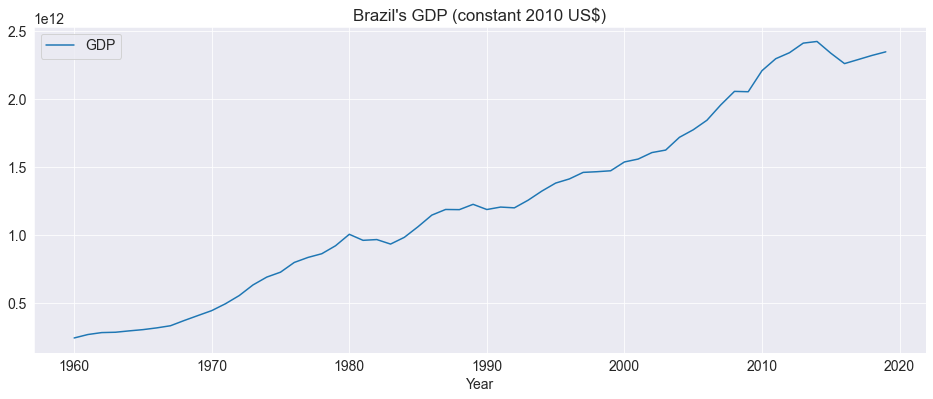

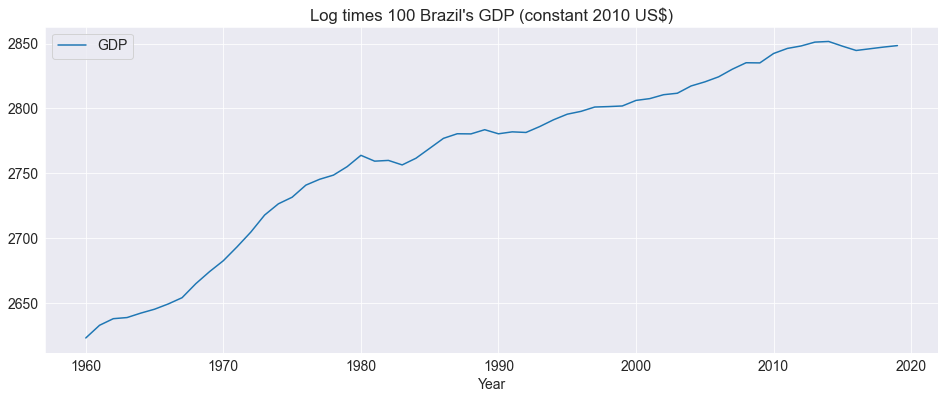

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     764.3
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           4.34e-35
Time:                        21:09:26   Log-Likelihood:                -258.23
No. Observations:                  60   AIC:                             520.5
Df Residuals:                      58   BIC:                             524.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2652.1087      4.761    557.050      0.0

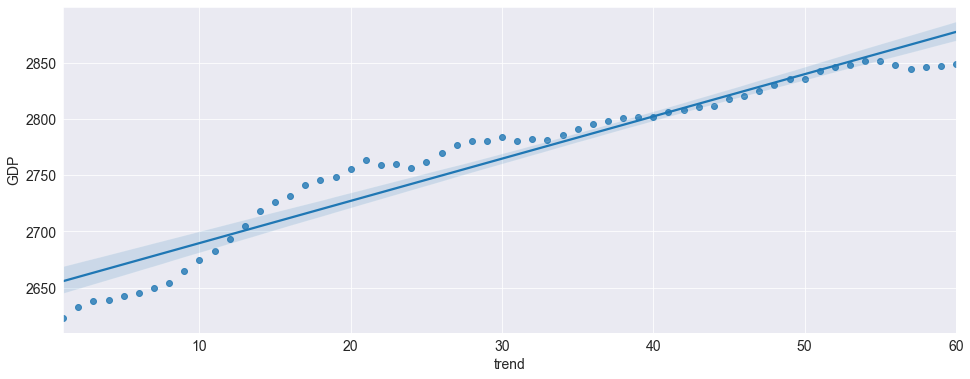

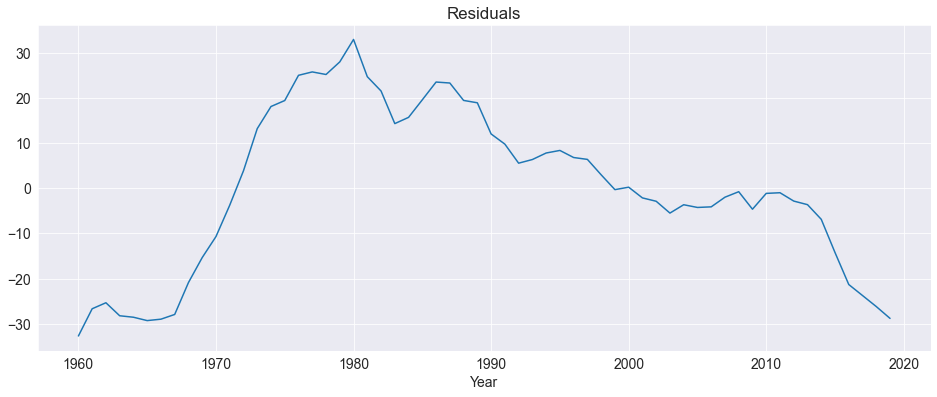

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

sns.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

df = pd.read_excel(r'C:\Users\jonas\Desktop\Econometrics III\Listas\API_NY.GDP.MKTP.KD_DS2_en_excel_v2_1217717.xls',
                   sheet_name = 'Data')

df = df.drop([0,1])
df = df[(df['World Development Indicators']=='BRA') |
        (df['World Development Indicators']=='Country Code')]
df = df.drop(['Data Source', 'Unnamed: 2', 'Unnamed: 3'],axis=1)
df = df.transpose()
df.columns = ['Year', 'GDP']

df = df.drop(df.index[0])
df['Year'] = df['Year'].astype('int')
df['GDP'] = df['GDP'].astype('float')
df.index = [i+1 for i in range(len(df))]

df.plot('Year', 'GDP')
plt.title("Brazil's GDP (constant 2010 US$)")
plt.show()

df['GDP'] = np.log(df['GDP'])*100

df.plot('Year', 'GDP')
plt.title("Log times 100 Brazil's GDP (constant 2010 US$)")
plt.show()

df['trend'] = [j+1 for j in range(len(df['GDP']))]

y, X = dmatrices('GDP ~ trend', data=df, return_type='dataframe')

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())
sns.regplot(X['trend'],y)
plt.show()
print("\n")

sns.lineplot(df['Year'], res.resid)
plt.title("Residuals")
plt.show()


## b)

In [2]:
y.index = pd.to_datetime(df['Year'], format = '%Y')

adf1 = ADF(y, trend = 'n')
print(adf1.summary().as_text())
print("\n")

adf2 = ADF(y, trend = 'c')
print(adf2.summary().as_text())
print("\n")

adf3 = ADF(y, trend = 'ct')
print(adf3.summary().as_text())
print("\n")

   Augmented Dickey-Fuller Results   
Test Statistic                  2.719
P-value                         0.999
Lags                                1
-------------------------------------

Trend: No Trend
Critical Values: -2.61 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


   Augmented Dickey-Fuller Results   
Test Statistic                 -2.329
P-value                         0.163
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.55 (1%), -2.91 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


   Augmented Dickey-Fuller Results   
Test Statistic                 -1.118
P-value                         0.926
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.12 (1%), 

## c)

In [3]:
pp1 = PhillipsPerron(y, trend = 'n')
print(pp1.summary().as_text())
print("\n")

pp2 = PhillipsPerron(y, trend = 'c')
print(pp2.summary().as_text())
print("\n")

pp3 = PhillipsPerron(y, trend = 'ct')
print(pp3.summary().as_text())
print("\n")

kpss1 = KPSS(y, trend = 'c')
print(kpss1.summary().as_text())
print("\n")

kpss2 = KPSS(y, trend = 'ct')
print(kpss2.summary().as_text())
print("\n")


     Phillips-Perron Test (Z-tau)    
Test Statistic                  3.740
P-value                         1.000
Lags                               11
-------------------------------------

Trend: No Trend
Critical Values: -2.60 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.402
P-value                         0.011
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.55 (1%), -2.91 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.150
P-value                         0.920
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.12 (1%), 